In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
from google.colab import drive
drive.mount('/content/drive')
file_path="/content/drive/MyDrive/House Price Preduction Dataset.csv"
#df=pd.read_csv("/content/drive/MyDrive/House Price Preduction Dataset.csv")
# Display the first few rows
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [13]:
# Check for missing values
df.isnull().sum()

# Separate features and target
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [15]:
# Initialize the model
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train, y_train)


LinearRegression()

In [16]:
# Predict on the test set
y_pred = lin_reg.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

# Calculate R² Score
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')


Root Mean Squared Error: 0.7455813830127761
R² Score: 0.5757877060324511


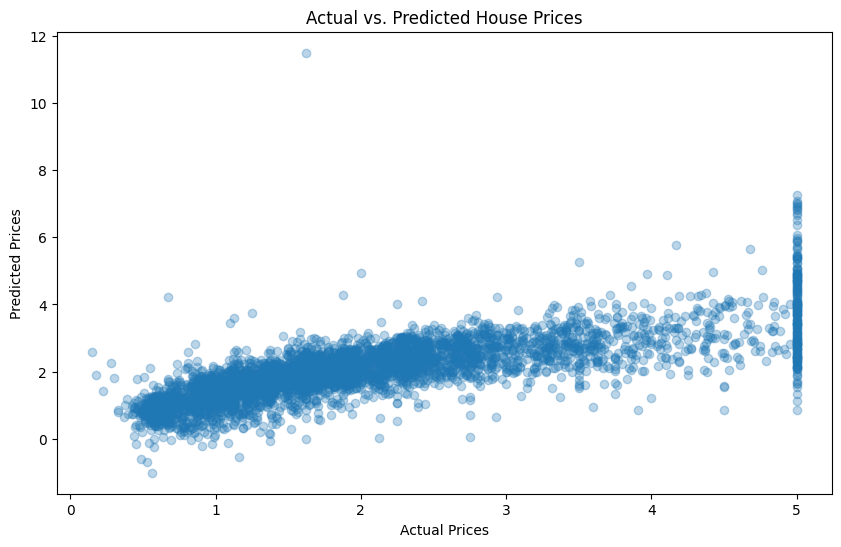

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted House Prices')
plt.show()
